In [1]:

import subprocess
import sys

def install_packages(packages):
    for package in packages:
        try:
            __import__(package)
        except ImportError:
            print(f"Installing {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])


required_packages = ["pandas", "nltk", "matplotlib", "seaborn", "tqdm", "jupyter", "ipywidgets"]


install_packages(required_packages)


import os
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.autonotebook import tqdm

Installing ipywidgets...


C:\Users\HP\AppData\Local\Temp\ipykernel_6332\4171995299.py:25: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
train_file = os.path.join("../Data", "twitter_data_train.csv")
test_file = os.path.join("../Data", "twitter_data_test.csv")
val_file = os.path.join("../Data", "twitter_data_val.csv")

In [3]:
train_data = pd.read_csv(train_file)
train_data.head()

,id,date,ticker,emo_label,senti_label,original,Unnamed: 6
0,100001,01-01-2020,AMZN,excitement,bullish,$AMZN Dow futures up by 100 points already 🥳,NaN
1,100002,01-01-2020,TSLA,excitement,bullish,$TSLA Daddy's drinkin' eArly tonight! Here's t...,NaN
2,100003,01-01-2020,AAPL,confusion,bullish,$AAPL We’ll been riding since last December fr...,NaN
3,100004,01-01-2020,TSLA,excitement,bullish,"$TSLA happy new year, 2020, everyone🍷🎉🙏",NaN
4,100005,01-01-2020,TSLA,excitement,bullish,"$TSLA haha just a collection of greats...""Mars...",NaN


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8000 non-null   int64  
 1   date         8000 non-null   object 
 2   ticker       8000 non-null   object 
 3   emo_label    8000 non-null   object 
 4   senti_label  8000 non-null   object 
 5   original     8000 non-null   object 
 6   Unnamed: 6   0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 437.6+ KB


In [5]:
data = train_data[["original", "emo_label", "senti_label"]]
data.head()

,original,emo_label,senti_label
0,$AMZN Dow futures up by 100 points already 🥳,excitement,bullish
1,$TSLA Daddy's drinkin' eArly tonight! Here's t...,excitement,bullish
2,$AAPL We’ll been riding since last December fr...,confusion,bullish
3,"$TSLA happy new year, 2020, everyone🍷🎉🙏",excitement,bullish
4,"$TSLA haha just a collection of greats...""Mars...",excitement,bullish


In [7]:
data.emo_label.value_counts()

emo_label
optimism      1299
anxiety       1099
excitement    1092
disgust       1037
belief         728
ambiguous      698
amusement      652
confusion      489
anger          309
panic          240
surprise       191
depression     166
Name: count, dtype: int64

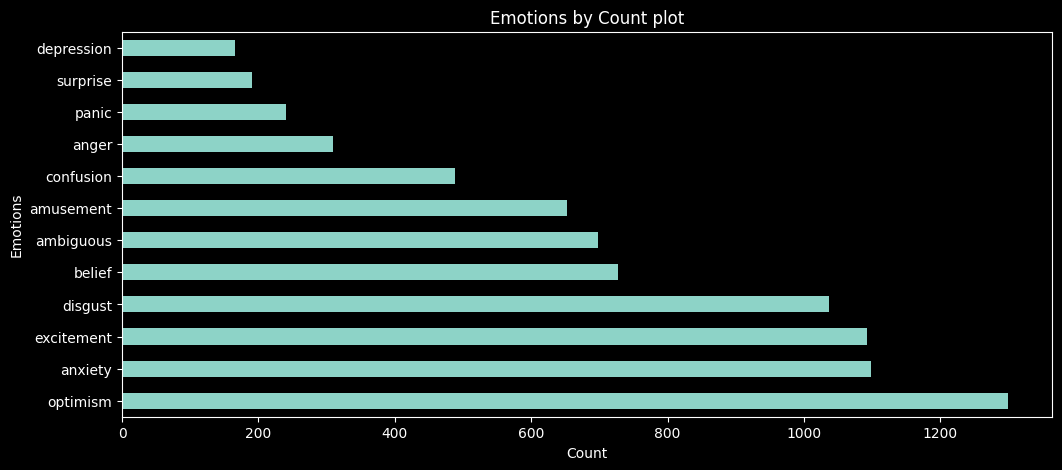

In [36]:
ax =data.emo_label.value_counts().sort_values(ascending=False) \
    .plot(kind="barh", figsize=(12, 5))
ax.set_xlabel("Count")
ax.set_ylabel("Emotions")
ax.set_title("Emotions by Count plot")
plt.show()

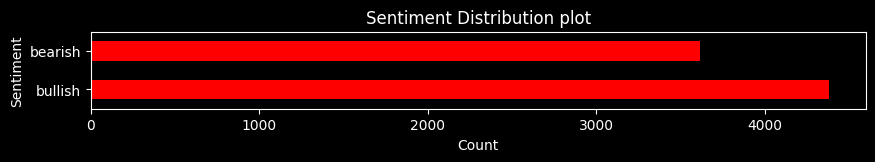

In [37]:
ax =data.senti_label.value_counts().sort_values(ascending=False) \
    .plot(kind="barh", figsize=(10, 1), color="red")
ax.set_ylabel("Sentiment")
ax.set_xlabel("Count")
ax.set_title("Sentiment Distribution plot")
plt.show()

Lets see what a piece of text we have in the tweets

In [38]:
example = train_data["original"][0]
example

'$AMZN Dow futures up by 100 points already 🥳'

- Since the data has both upper and lower case letters, we have to lower it first.
- The data contains some emojis, that are to be converted to text.
- The data also contains numbers and special symbols that are to be removed before converting them to word embeddings.

In [39]:
train_data.head()

,id,date,ticker,emo_label,senti_label,original,Unnamed: 6
0,100001,01-01-2020,AMZN,excitement,bullish,$AMZN Dow futures up by 100 points already 🥳,NaN
1,100002,01-01-2020,TSLA,excitement,bullish,$TSLA Daddy's drinkin' eArly tonight! Here's t...,NaN
2,100003,01-01-2020,AAPL,confusion,bullish,$AAPL We’ll been riding since last December fr...,NaN
3,100004,01-01-2020,TSLA,excitement,bullish,"$TSLA happy new year, 2020, everyone🍷🎉🙏",NaN
4,100005,01-01-2020,TSLA,excitement,bullish,"$TSLA haha just a collection of greats...""Mars...",NaN


In [40]:
import emoji
train_data["processed"] = ""
train_data.dropna(how="all", axis=1, inplace=True)
for i, row in train_data.iterrows():
    processed_tweet = emoji.demojize(row["original"], delimiters=(" ", " "))
    train_data.loc[i, "processed"] = processed_tweet

In [41]:
train_data.sample(5)

,id,date,ticker,emo_label,senti_label,original,processed
5895,105955,22-09-2020,AMZN,surprise,bullish,$AMZN magic word Jeff is STOCK-SPLIT📈✅,$AMZN magic word Jeff is STOCK-SPLIT chart_inc...
3720,103768,13-07-2020,AAPL,amusement,bearish,"$AAPL the perfect storm Overvalued, Overrated,...","$AAPL the perfect storm Overvalued, Overrated,..."
4231,104284,06-08-2020,AAPL,belief,bullish,$AAPL No point in selling mfs 🥂🥂,$AAPL No point in selling mfs clinking_glasse...
2818,102860,08-05-2020,AAPL,optimism,bullish,$AAPL haha guess I should have held those 300 ...,$AAPL haha guess I should have held those 300 ...
6824,106887,10-11-2020,BA,depression,bullish,$BA why why did I sell this yesterday 😭 😭 but ...,$BA why why did I sell this yesterday loudly_...


In [42]:
print("Original : ", train_data["original"][0])
print("Processed : ", train_data["processed"][0])

Original :  $AMZN Dow futures up by 100 points already 🥳
Processed :  $AMZN Dow futures up by 100 points already  partying_face 


In [43]:
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# nltk.download("punkt")
# nltk.download("stopwords")
# nltk.download("wordnet")

def process_text(text):
    text = text.lower()
    text = text.replace("_", " ")
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens =  wordpunct_tokenize(text)
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

print("Original tweet : ", train_data.original[1])
print("Processed tweet : ", process_text(train_data.processed[1]))

Original tweet :  $TSLA Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! 🍻
Processed tweet :  tsla daddy drinkin early tonight here pt ohhhhh clinking beer mug


In [44]:
from nltk.sentiment import SentimentIntensityAnalyzer
# nltk.download("vader_lexicon")

sia = SentimentIntensityAnalyzer()

def extract_sentiment_intensity(text):
    scores = sia.polarity_scores(text)
    return scores

example = process_text(train_data.processed[56])
print("Processed tweet : ", example)
print("Sentiment Score : ", extract_sentiment_intensity(example))

Processed tweet :  aapl green morning as yall taken profit face tear joy man facepalming light skin tone eye red apple
Sentiment Score :  {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.7717}


In [45]:
with open("../Dictionary/Positive-words.txt") as f:
    positive_words = f.readlines()
    positive_words = [word.lower().replace("\n", "") for word in positive_words]

In [46]:
print(f"There are {len(positive_words)} positive words in our dictionary.")
print(positive_words[:10])

There are 5758 positive words in our dictionary.
['aah', 'abeam', 'abide', 'abiding', 'abidingly', 'ability', 'ablaze', 'able', 'able-bodied', 'abled']


In [47]:
with open("../Dictionary/Negative-words.txt") as f:
    negative_words = f.readlines()
    negative_words = [word.lower().replace("\n", "") for word in negative_words]
print(negative_words[:10])

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [48]:
print(f"There are {len(negative_words)} negative words in our dictionary.")

There are 4534 negative words in our dictionary.


Now lets take an example and see which sentences can be positive, negative or neutral by counting the words in them

In [49]:
tweets = [
    "Apple stock is on fire! 🚀 Just broke an all-time high—huge upside potential ahead! #Bullish #Investing",  
    "Tesla is crashing hard! Down 10% today—investors are panicking. Could see more downside. #Bearish #StockMarketCrash",
    "Microsoft announced its quarterly earnings today. Revenue met expectations. Let's see how the market reacts."
]

In [50]:
def process_text(text):
    text = text.strip()
    text = emoji.demojize(text)
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = wordpunct_tokenize(text)
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens
    



for tweet in tweets:
    tokens = process_text(tweet)
    pos_count = 0
    neg_count = 0
    neutral_count = 0
    for token in tokens:
        if token in positive_words:
            pos_count += 1
        elif token in negative_words:
            neg_count += 1
        else:
            neutral_count += 1

    sentiment_score = (pos_count - neg_count) / len(tokens)
    print(f"Positive Count : {pos_count}, Negative Count : {neg_count}, Neutral Count : {neutral_count}, Sentiment Score: {sentiment_score:.2f}")

Positive Count : 3, Negative Count : 1, Neutral Count : 8, Sentiment Score: 0.17
Positive Count : 1, Negative Count : 5, Neutral Count : 4, Sentiment Score: -0.40
Positive Count : 1, Negative Count : 0, Neutral Count : 11, Sentiment Score: 0.08


Testing the above logic for our own data 

In [51]:
train_data = pd.read_csv(train_file)
train_data.head()

,id,date,ticker,emo_label,senti_label,original,Unnamed: 6
0,100001,01-01-2020,AMZN,excitement,bullish,$AMZN Dow futures up by 100 points already 🥳,NaN
1,100002,01-01-2020,TSLA,excitement,bullish,$TSLA Daddy's drinkin' eArly tonight! Here's t...,NaN
2,100003,01-01-2020,AAPL,confusion,bullish,$AAPL We’ll been riding since last December fr...,NaN
3,100004,01-01-2020,TSLA,excitement,bullish,"$TSLA happy new year, 2020, everyone🍷🎉🙏",NaN
4,100005,01-01-2020,TSLA,excitement,bullish,"$TSLA haha just a collection of greats...""Mars...",NaN


In [52]:
train_data["Sentiment score"] = 0.0

In [53]:
train_data.head()

,id,date,ticker,emo_label,senti_label,original,Unnamed: 6,Sentiment score
0,100001,01-01-2020,AMZN,excitement,bullish,$AMZN Dow futures up by 100 points already 🥳,NaN,0.0
1,100002,01-01-2020,TSLA,excitement,bullish,$TSLA Daddy's drinkin' eArly tonight! Here's t...,NaN,0.0
2,100003,01-01-2020,AAPL,confusion,bullish,$AAPL We’ll been riding since last December fr...,NaN,0.0
3,100004,01-01-2020,TSLA,excitement,bullish,"$TSLA happy new year, 2020, everyone🍷🎉🙏",NaN,0.0
4,100005,01-01-2020,TSLA,excitement,bullish,"$TSLA haha just a collection of greats...""Mars...",NaN,0.0


In [56]:
def process_text(text):
    text = text.strip()
    text = emoji.demojize(text)
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = wordpunct_tokenize(text)
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

train_data.dropna(how="all", axis=1, inplace=True)
for i, row in tqdm(train_data.iterrows(), total=train_data.shape[0]):
    tweet = row["original"]
    tokens = process_text(tweet)
    pos_count = 0
    neg_count = 0
    for token in tokens:
        if token in positive_words:
            pos_count += 1
        elif token in negative_words:
            neg_count += 1
        else:
            neutral_count += 1

    sentiment_score = (pos_count - neg_count) / len(tokens) if len(tokens) > 0 else 0
    train_data.loc[i, "Sentiment score"] = sentiment_score    

100%|██████████| 8000/8000 [00:12<00:00, 624.97it/s]


In [57]:
train_data.sample(5)

,id,date,ticker,emo_label,senti_label,original,Sentiment score
3376,103423,19-06-2020,TSLA,disgust,bullish,$TSLA there are still bears in here? 😂,0.250000
5738,105797,17-09-2020,TSLA,ambiguous,bearish,$TSLA bulls be like buy the dip it's going up 🤪,0.428571
1512,101539,16-03-2020,TSLA,disgust,bearish,$TSLA do you want to hear a joke? Buy tesla it...,0.375000
4353,104406,13-08-2020,AAPL,excitement,bullish,$AAPL we’re popping 📈 up $15+ today for sure!,0.400000
6676,106737,29-10-2020,AAPL,panic,bearish,$AAPL going sub 100 post ER? 😱😱😱,0.000000


According to the distribution, we have to adjust the threshold to classify them as Positive, Negative and Neutral tweet

In [58]:
train_data["Sentiment score"].describe()

count    8000.000000
mean        0.130263
std         0.163053
min        -0.500000
25%         0.000000
50%         0.136364
75%         0.250000
max         0.777778
Name: Sentiment score, dtype: float64

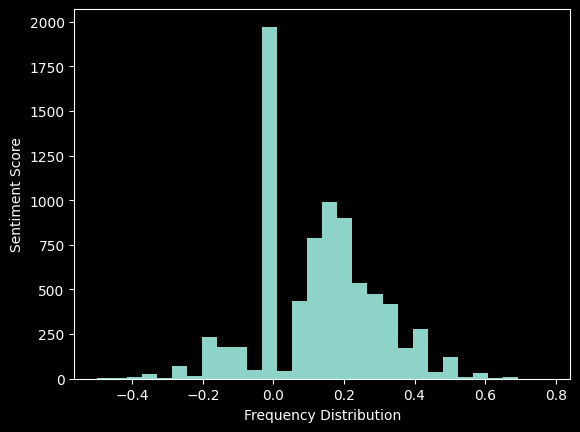

In [59]:
ax = train_data["Sentiment score"].plot(kind="hist", bins=30)
ax.set_xlabel("Frequency Distribution")
ax.set_ylabel("Sentiment Score")
plt.show()

In [60]:
lower_threshold = train_data["Sentiment score"].quantile(0.30)
upper_threshold = train_data["Sentiment score"].quantile(0.70)

print("Upper threshold : ", upper_threshold)
print("Lower threshold : ", lower_threshold)

Upper threshold :  0.2
Lower threshold :  0.0


In [61]:
def classify_sentiment(score):
    if score >= upper_threshold:
        return "Positive"
    elif score < lower_threshold:
        return "Negative"
    else:
        return "Neutral"

train_data["Sentiment Label"] = train_data["Sentiment score"].apply(classify_sentiment)

In [62]:
train_data.head()

,id,date,ticker,emo_label,senti_label,original,Sentiment score,Sentiment Label
0,100001,01-01-2020,AMZN,excitement,bullish,$AMZN Dow futures up by 100 points already 🥳,0.000000,Neutral
1,100002,01-01-2020,TSLA,excitement,bullish,$TSLA Daddy's drinkin' eArly tonight! Here's t...,0.111111,Neutral
2,100003,01-01-2020,AAPL,confusion,bullish,$AAPL We’ll been riding since last December fr...,0.153846,Neutral
3,100004,01-01-2020,TSLA,excitement,bullish,"$TSLA happy new year, 2020, everyone🍷🎉🙏",0.400000,Positive
4,100005,01-01-2020,TSLA,excitement,bullish,"$TSLA haha just a collection of greats...""Mars...",0.000000,Neutral


In [63]:
train_data["Sentiment Label"].value_counts()

Sentiment Label
Neutral     4376
Positive    2857
Negative     767
Name: count, dtype: int64

In [64]:
train_data[train_data["Sentiment Label"] == "Neutral"].sample(5)

,id,date,ticker,emo_label,senti_label,original,Sentiment score,Sentiment Label
1077,101094,02-03-2020,TSLA,amusement,bullish,"$TSLA but wait, shorts were swearing this is g...",0.000000,Neutral
1234,101256,06-03-2020,TSLA,anxiety,bearish,"$TSLA opens at $600, 🌈 🐻 will be bathing in te...",0.111111,Neutral
7120,107184,24-11-2020,BA,anxiety,bullish,$BA I’m sensing a reversal tomorrow . 🤕,0.000000,Neutral
2,100003,01-01-2020,AAPL,confusion,bullish,$AAPL We’ll been riding since last December fr...,0.153846,Neutral
6797,106860,09-11-2020,AAPL,confusion,bearish,$AAPL 117 put make money this week ? 🤔,0.166667,Neutral


In [69]:
sia = SentimentIntensityAnalyzer()

train_data["compound score"] = 0.0

for i, row in tqdm(train_data.iterrows(), total=train_data.shape[0]):
    text = process_text(row["original"])
    text = " ".join(text)
    scores = sia.polarity_scores(text)
    train_data.loc[i, "compound score"] = scores["compound"]


100%|██████████| 8000/8000 [00:05<00:00, 1447.73it/s]


In [70]:
train_data.sample(5)

,id,date,ticker,emo_label,senti_label,original,Sentiment score,Sentiment Label,compound score
5114,105170,03-09-2020,TSLA,disgust,bearish,$TSLA \n\nWow... Sorry about your bad luck tec...,0.250000,Positive,0.7783
2836,102879,12-05-2020,DIS,ambiguous,bearish,$DIS can’t wait to sell me puts tomorrow for s...,0.166667,Neutral,0.3400
2781,102823,07-05-2020,DIS,anxiety,bearish,"$DIS start selling off fellas, next stop: $90 ...",0.250000,Positive,-0.2960
5896,105956,22-09-2020,TSLA,amusement,bullish,$TSLA time to face the music shorts. This has ...,0.296296,Positive,0.1280
5671,105729,16-09-2020,WMT,optimism,bullish,"$WMT walmart+, another stimulus, new game cons...",0.272727,Positive,0.6705


In [71]:
def classify_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

train_data["Compound Label"] = train_data["compound score"].apply(classify_sentiment)

In [72]:
train_data["Compound Label"].value_counts()

Compound Label
Positive    3245
Neutral     3078
Negative    1677
Name: count, dtype: int64

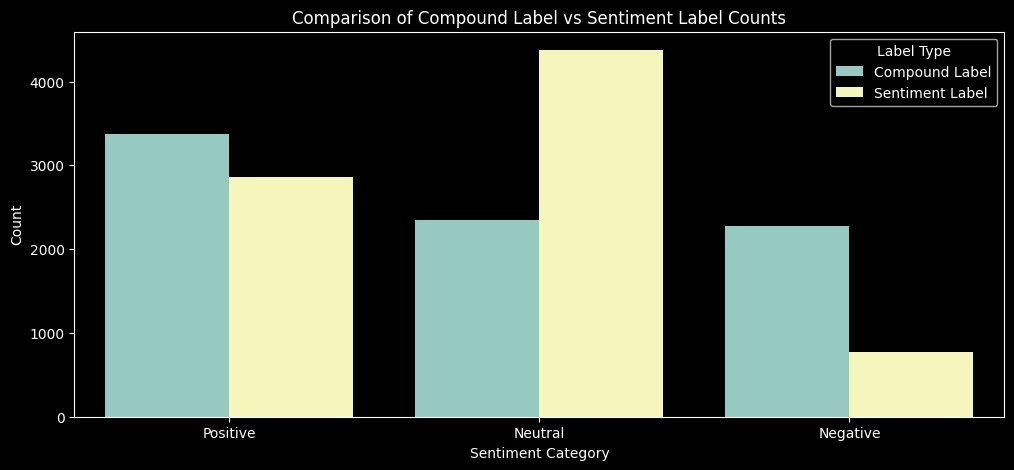

In [73]:
data = {
    "Sentiment": ["Positive", "Neutral", "Negative"],
    "Label Type": ["Compound Label", "Compound Label", "Compound Label"],
    "Count": [3373, 2345, 2282]
}

data2 = {
    "Sentiment": ["Positive", "Neutral", "Negative"],
    "Label Type": ["Sentiment Label", "Sentiment Label", "Sentiment Label"],
    "Count": [2857, 4376, 767]
}

df = pd.DataFrame(data)
df2 = pd.DataFrame(data2)
df = pd.concat([df, df2])

plt.figure(figsize=(12, 5))
sns.barplot(x="Sentiment", y="Count", hue="Label Type", data=df)

plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.title("Comparison of Compound Label vs Sentiment Label Counts")
plt.legend(title="Label Type")
plt.show()

In [75]:
train_data["tokens"] = train_data["original"].apply(process_text)

In [82]:
max_len = float("-inf")
min_len = float("inf")
for i in range(train_data.shape[0]):
    max_len = max(max_len, len(train_data.tokens[i]))
    min_len = min(min_len, len(train_data.tokens[i]))


33 2


In [85]:
print(train_data.tokens[1])

['tsla', 'daddys', 'drinkin', 'early', 'tonight', 'heres', 'pt', 'ohhhhh', 'clinkingbeermugs']
